- 

- **Ensemble learning**: multiple predictive modeling methods are used in conjuction with one another
- **Pruning**:
    - the process of taking a fully grown tree and progressively cutting its branches back to reduce overfitting
    - A full grown tree overfits the data and it must be pruned back so it captures signal and not noise,  when no further splits can be made the tree is fully grown and each terminal node/leaf has records of a single class
- **Gini Index/Impurity**: method to split the samples 
    $$Gini(p) = 1 - \sum_{i=1}^{C} p_i^2$$
    where p is the p is the probability distribution of the classes and c is the total number of classes
    - the extent to wich a mix of classes is found in a subpartition of the data (heterogenecity)
    - it is used in classification to determine the splitting critition at each node
- **Gini vs purity**: Gini aims to minimize the probability of the missclassification, while purity focuses on having a dominant majority class in a node
- **Boosting**:
    - makes use of trees with fewer splits (reduce bias and model error)
    - it combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy
    - learns from updated versions of the residuals
- **Bagging**:
    - boostrap aggregating
    - it creates a different training subset from sample training data with repalcement
- **Out Of Bag (OOB)**: estimates the error rate for the trained models, data left out of the training set for that tree
- **AdaBoost**: An early version of the boosting that re-weights the data based on the residuals
- **Gradient Boosting** minimizes a cost function
    - The Gradient Boosting algorithm can be used either for classification or for Regression models. It is a Tree based estimator — meaning that it is composed of many decision trees.
    - The result of the _Tree 1_ will generate errors. Those errors will be used as the input for the _Tree 2_. Once again, the errors of the last model will be used as the input of the next one, until it reaches the n_estimators value.
- **Learning Rate**: is the size of the step we take to get to the minimum error. If we use a value that is too high, we may pass the minimum. If we use a number that is too small, we may not even get close to it. So, a rule of thumb you can consider is: 
    - if you have a large number of estimators, you can use lower values of learning rate
    - if you have just a few estimators, prefer using higher values of learning rate
- **Stochastic Gradient Boosting**: resampling of records and columns in each round

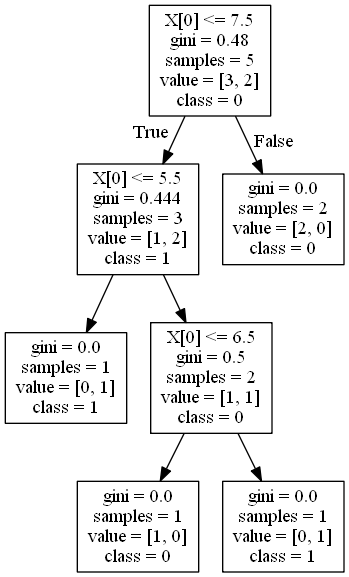

### Decison Tree
- It is rule based
- Overfitting is a practical problem while building a decision tree model
- Use cross-validation data to check the effect of prunning and test whether expanding a node will make an improvement or not
- It gives different results if you run it enough times, even if you feed it with the same data. This is because the decision tree does not give us a 100% certain answer (because it samples the data every time).
- It is based on the probability of an outcome, and the answer will vary.
        
#### Pros & Cons
<table>
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Easy to use (it is based on a set of rules)</td>
    <td>Prone to overfitting</td>
  </tr>
  <tr>
    <td>it follows the same approach as human generally while making decisions</td>
    <td>generally it gives low prediction accuracy for a dataset as compared to other ML models</td>
  </tr>
  <tr>
    <td>Faster than Random Forest</td>
    <td>Information gain in a decision tree with categorical variables gives a biased response for attributes with greater number of categories</td>
  </tr>
  <tr>
    <td></td>
    <td>calculation can become complex when there are many class labels</td>
  </tr>
  <tr>
    <td></td>
    <td>Doesn't scale well</td>
  </tr>
  <!-- Add more rows as needed -->
</table>


### Random Forest

- Bagging algorithms only control for variance
- Random Forest is a type of ensemble learning algorithm that combines multiple decision trees to make more accurate preddictions by training a set of decision trees on random selected data and then averaging the predictions of each tree to obtain the final prediction.  
- It produces a more accurate predictions than a simple tree but the intuition decision rules are lost
- Predictions are somewhat noisy
- It has the ability to automatically determine which predictors are important and discovers complex relationships
- Sample the predictor variables (features) when splitting the trees
    - helps to decorrelate the trees (bagging)
    - Captures variables importance - since we pick the tree with highest information gain
    - reduces overfitting
    - reduces variance (ensemble averaging/ majority voting)
- Slower than decision tree
- Doesn't use set of formulas
- It is less sensitive to nouse and outliers because of boostrapping/bagging, random feature selection, majoroty voting/ ensemble averaging
- It can handle large datasets with many features and can be trained efficiently on parallel and distributed systems
- It provides feature importance scores that can be used to understand the relative importance of each feature in the predicton. The scores are typically calculated based on the reduction in the impurity of the node when the feature is used to split the data.
- Random Forest can handle missing data by using imputation
- Disadvantage - very complex
- **Steps**:
    1. A subset the data points and a subset features is selected for constructing each decision tree (bagging)
    2. Individual decision trees are constructed for each sample
    3. Each decision tree will generate an output
    4. Final output is considered based on majority of voting or averaging for classification and regression respectively
- It uses boostrapping: it chooses random subsets of observations to create classifiers, there are observations that are left out in the selection process. There "out of bag (OOB)" observations can be used to evaluate the model, similarly that of the test set. Keep in mind, that out of bag estiomation can overstimate error in binary classification problems and should only be used as a complement to other metrics.  
- It creates the decision trees using recursive partitioning by splitting the data into smaller and smaller subsets based on the values of the features until the subsets are homogeneous with respect to the target variable (it uses gini impurity or entropy)
- It can handle imbalance data by adjusting the class weights during training. Class weights are used to give more importance to the minority class.
- parameters
    - ```n_estimators``` the number of trees in the forest 
    - ```criterion``` the function used to measure the quality of the split (e.g. Gini for impurity, entropy for information gain)
    - ```max_depth``` the maximum depth of each decision tree. Default value is None, which means that the nodes are expanded until all the leaves are pure or until the number of samples in a leaf node is below minimum sample split
    - ```min_sample_split``` the minimum number of samples requiered to split an internal node
    - ```min_samples_leaf``` the minimum number of samples requiered to be at a leaf node
    - ```max_features``` the number of features to consider when looking at the best split. Default value is 'auto' which means that all features are considered.
    - ```boostrap``` whether to sample the data with replacement when building each tree. 
    - ```oob_score``` whether to use out-of-bag samples to estimate the generalization error
    - ```n_jobs``` the number of CPU cores to use for parallel computation. Default value is None which means that all available cores are used. 


## Gradient Boosting 

- it controls for bias and variance
- it is a sequential technique which works on the principle of ensemble
- It combines a set of weak learners
- At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1
- tree specific features
    1. min_samples_split
        1. Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
        2. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
        3. Too high values can lead to under-fitting hence, it should be tuned using CV.
    2. min_samples_leaf
        1. Defines the minimum samples (or observations) required in a terminal node or leaf.
        2. Used to control over-fitting similar to min_samples_split.
        3. Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
    3. min_weight_fraction_leaf
        1. Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
        2. Only one of #2 and #3 should be defined.
    4. max_depth
        1. The maximum depth of a tree.
        2. Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
        3. Should be tuned using CV.
    5. max_leaf_nodes
        1. The maximum number of terminal nodes or leaves in a tree.
        2. Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
        3. If this is defined, GBM will ignore max_depth.
    6. max_features
        1. The number of features to consider while searching for a best split. These will be randomly selected.
        2. As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
        3. Higher values can lead to over-fitting but depends on case to case.
        
- Algorithm for 2 classes
    1. Initialize the outcome
    2. Iterate from 1 to total number of trees
       1. Update the weights for targets based on previous run (higher for the ones mis-classified)
       2. Fit the model on selected subsample of data
       3. Make predictions on the full set of observations
       4. Update the output with current results taking into account the learning rate
    3. Return the final output.
    
- boosting features
    1. learning_rate
        - This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
        - Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
        - Lower values would require higher number of trees to model all the relations and will be computationally expensive.
    2. n_estimators
        - The number of sequential trees to be modeled (step 2)
        - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
    3. subsample
        - The fraction of observations to be selected for each tree. Selection is done by random sampling.
        - Values slightly less than 1 make the model robust by reducing the variance.
        - Typical values ~0.8 generally work fine but can be fine-tuned further.
        
- miscellaneous features 
    1. loss
        - It refers to the loss function to be minimized in each split.
        - It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
    2. init
        - This affects initialization of the output.
        - This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
    3. random_state
        - The random number seed so that same random numbers are generated every time.
        - This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
        - It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
    4. verbose
        - The type of output to be printed when the model fits. The different values can be:
            - 0: no output generated (default)
            - 1: output generated for trees in certain intervals
            - >1: output generated for all trees
    5. warm_start
        - This parameter has an interesting application and can help a lot if used judicially.
        - Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
    6. presort 
        - Select whether to presort data for faster splits.
        - It makes the selection automatically by default but it can be changed if needed.
        
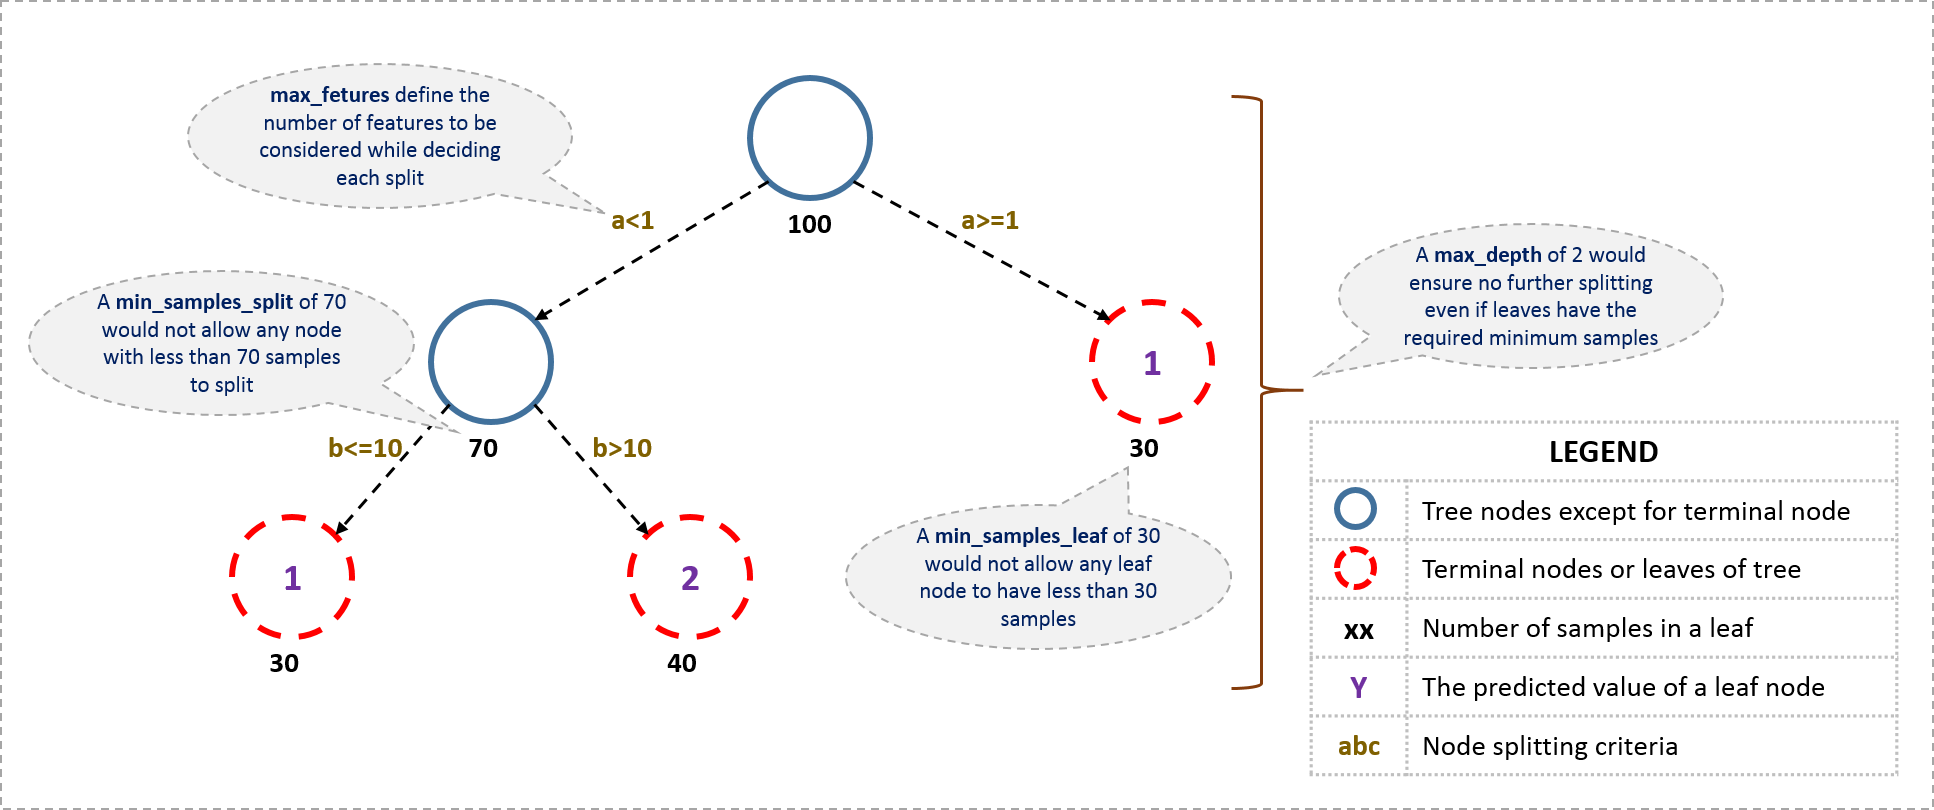

### XGBoost
- fast learning through parallel and distributing computing
- efficient memory usage
- the depth of the tree could optimally selected through validation techniques such as 'k-fold' cross  validation
- Having a large tree might lead to overfitting 
- It learns from previous mistakes by using residual errors, rather than updatting the weights of data points like Ada Boost
- Combine a set of weak learners into a stronger learning to minimize training error and loss 
- It can be used for classification, regression, and ranking features.  

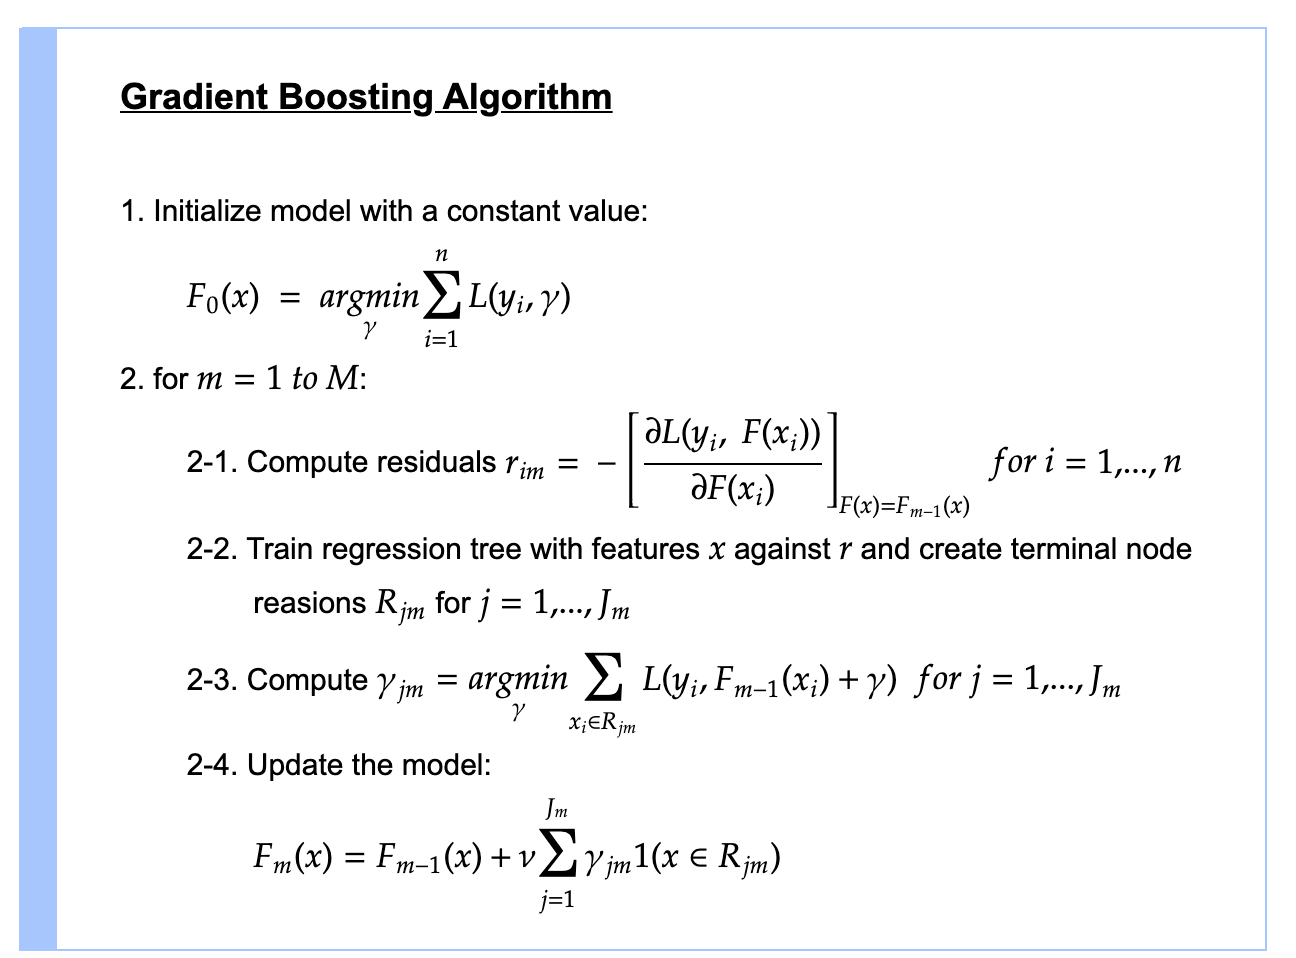

### Random Forest vs XGBoost

- RF builts each tree independently, whereas XGB builts each tree sequentially and tries to correct the mistakes of previous trees (XGB can often achieve higher accuracy for complex datasets)
- XGB uses gradient boosting approach, which means that it tries to optimize a loss function by iteratively adding decisions trees that minimizes the loss. RF on the other hand, uses a bagging approach. 
- XGB allows for more fine grained control over the model's hyperparameters which can help optimize the performance of the model for specific task. 
- XGBoost is computationally more expensive than RF, especially for large datasets due to the sequential nature of the algorithm. On the other hand, RF can be parallelized abd scaled more easily. 
- RF is good choice for datasets with small to medium number of features and a relative simple structure.
- XGB is good choice for datasets with large number of features and complex structure and it may require more tuning and experimentation to achieve optimal performance
